# Notebook 3: Individual Parks

The next step in our process was to scale down our analysis to the park level and examine CES servies offered by park. Since our methodology closely follows the Hale (2019) aricle, we needed to hand-code a select set of the tags into Hale's predefined CES buckets. To do this, we first coded the top 200 tags across all parks to get a sense of the types of services offered across all parks. The top 100 tags did not yield enough codeable tags, so we expanded that selection for a more robust sample. 

Tags themeselves are coded into one of the following categories (we did not cross-code, for parsimony, though we recognize that future analysis would yield more comprehensive results if tags could be cross-coded): existence, recreation, social relations, aesthetics, spritual, knowledge systems, inspiration, cultural heritage, education, sense of place, and culutral diversity. 

We coded parks that had at least 50 unique tags associated with that specific park. The coded parks are: MacArthur, Franklin Canyon, Hancock,Rio de Los Angeles, Runyon Canyon, Coldwater Creek, Cheviot Hills, and Angels Gate. We coded tags that fit into each of the above cateogories, but did not code tags that did not equate to a CES (i.e., nonsensical tags, vague tags, or tags for unidentifiable built infrastructure). 

# clean version

1. Get CES frequences by park

In [2]:
import pandas as pd

category_map = { 'Existence': ['westlake', 'lake','palmtrees','palms','elks','parkplaza','birds','palmtree', 'santamonicamountains','franklincanyonlake','losangelesmountains','mayberrylake','myerslake','grass','lake','trees','ducks','water','evergreens','frog','woods', 'ice', 'fluids','iceblocks','blocksofice','wallofice','harbor', 'sky', 'weather','tree','cloudy','garden','parks','lariver','losangelesriver','grass','mountains','canyons','hills','mountains','hill','horse','tujungawashgreenway','tujungawash','pacificocean','sky','weather','tree','cloudy'], 
                'Recreation': ['music','bikes','lilihaydn','bicycles','violin','ciclovia','loslobos','event', 'rustythedog','canine','chihuahuamix','mutt','dog','pet','weeksfordogs','urbanhiking', 'costumes', 'costume', 'cosplay', 'boomerang', 'lighthouse','westerncup','sports', 'quidditch', 'dog', 'puggle', 'puppy', 'referee', 'boat', 'nikon', 'nikond','gardentour','fish','campout','hiking','hike','sunriserunyon','sunriseinrunyon','sunriseinrunyoncanyonpark','trail','observatory','run','jog','summerolympics','westerncup','sports','quidditch','nikon','nikond','dog','puggle','puppy','referee','boat'], 
                'Social Relations': ['ciclavia','rally','protest','keepfamliestogethor','tamale','asada','alpastor','march','carnitas','eltaurino','burrito','thegreattacohunt','lasantacon','people','tacos','food','harrypotter', 'wand', 'geeks', 'geek','gardenparty','people','picnik','walkathon','earthday','zurbulon','harrypotter','wand'],
                'Aesthetics': ['colorful','green', 'landscape','textures','texturemaps','texturemap','texture','sunset','sky','skyline','clouds','sun','weather','sunrise','pacificocean','panorama','color','overlook','sunset','viewpoint','scenicoverview','mulhollandscenicoverview','brown','barbaraafineoverlook','lasunset','green','landscape'],
                'Spiritual': ['signs','sanity','nature','neature','harborinterfaith','outside','church','littlebrownchurchinthevalley'], 
                'Inspiration':['art','portraitsofhope','publicart', 'artonthewaterfront', 'artist', 'sculpture', 'printmaking', 'portrait', 'contemporaryart', 'painting', 'polaroid', 'draw', 'photographer', 'studioartist', 'prints','mural'],
                'Cultural Heritage': ['landmark','monument', 'curlettandbeelman','fortmacarthur','warreinactment', 'agcc', 'angelsgateculturalcenter', 'openstudios', 'allankaprow', 'gallerya', 'artgallery', 'gallery', 'artexhibition', 'slobodandimitrov', 'culturalcenter', 'exhibition', 'downstairsgallery', 'installation', 'hillarybradfield', 'festival','parlance','sculpture','art','statue','treasuresoflosangelesarchitecture','losangelesstatehistoricpark','midcenturymodernhomes','charliechaplin','parlance'],
                'Sense of Place': ['neighborhood','community','eccideasclub', 'sanpedro', 'neighborhood'], 
                'Cultural Diversity': ['mexican','lengua','march','immigration','czechart','lapride','westhollywoodpride','lagaypride','westhollywoodgaypride','losangelespride','losangelesgaypride','pride','gaypride'],
                'Knowledge Systems': ['historyofsanpedropunk', 'belleepoque','lahistory','californiahistory'],
                'Education': ['portoflosangeles', 'port','portofla','marshallastor','berth','georgecpagemuseum','museums','losangelescountymuseumofart','iceage','pleistocene','skeletons','skulls','pit','tarpits','labreatarpits','labrea','museum','pagemuseum','fossils','bones','paleontology','lacma','animalsmammoths','excavation','sabretooth','tigers','giantgroundsloths','gettyhouse','tar','sabretoothtigers','olympusem','skeleton','fossil','mammoth','mastodon','environmentaljustice','urbanparkmovement','losangelespubliclibrary'
                             ]}

# Import the csv of frequencies for each park under consideration
fns = ['top_tags_angelsgate.csv','top_tags_cheviothills.csv','top_tags_coldwatercanyon.csv',
       'top_tags_franklincanyonpark.csv','top_tags_hancockpark.csv','top_tags_macarthur.csv',
       'top_tags_riodelosangeles.csv','top_tags_runyoncanyon.csv']
parks_frequency = []
for fn in fns: 
    parks_frequency.append(pd.read_csv(fn))

#print(parks_frequency)

# Create a function to loop over the categories and sum the words associated with each category  
def getCategories(frequencyDf):
    
    category_frequencies = dict.fromkeys(category_map,0)
    
    for index, row in frequencyDf.iterrows():
        #print(row['tags'],row['value'])
        for category_name in category_map:
            wordlist = category_map[category_name]
            if row['tags'] in wordlist:
                category_frequencies[category_name]+=row['value']
            
    return category_frequencies
    
# Create a list of dictionaries with the frequencies by category for each park
cat_frequencies = []
for park in parks_frequency:
    cat_frequencies.append(getCategories(park))

print(cat_frequencies)

[{'Existence': 325, 'Recreation': 48, 'Social Relations': 0, 'Aesthetics': 10, 'Spiritual': 7, 'Inspiration': 412, 'Cultural Heritage': 1305, 'Sense of Place': 50, 'Cultural Diversity': 7, 'Knowledge Systems': 17, 'Education': 120}, {'Existence': 4, 'Recreation': 78, 'Social Relations': 43, 'Aesthetics': 5, 'Spiritual': 0, 'Inspiration': 0, 'Cultural Heritage': 14, 'Sense of Place': 1, 'Cultural Diversity': 0, 'Knowledge Systems': 0, 'Education': 0}, {'Existence': 33, 'Recreation': 1, 'Social Relations': 2, 'Aesthetics': 9, 'Spiritual': 2, 'Inspiration': 14, 'Cultural Heritage': 2, 'Sense of Place': 0, 'Cultural Diversity': 0, 'Knowledge Systems': 27, 'Education': 1}, {'Existence': 64, 'Recreation': 44, 'Social Relations': 0, 'Aesthetics': 1, 'Spiritual': 11, 'Inspiration': 2, 'Cultural Heritage': 0, 'Sense of Place': 0, 'Cultural Diversity': 0, 'Knowledge Systems': 0, 'Education': 0}, {'Existence': 69, 'Recreation': 58, 'Social Relations': 189, 'Aesthetics': 0, 'Spiritual': 0, 'Inspir

2. Convert ces frequency list into a dataframe

In [3]:
parksdf = pd.DataFrame(cat_frequencies)
print(parksdf)

   Existence  Recreation  Social Relations  Aesthetics  Spiritual  \
0        325          48                 0          10          7   
1          4          78                43           5          0   
2         33           1                 2           9          2   
3         64          44                 0           1         11   
4         69          58               189           0          0   
5        455         166               567          25         37   
6         14           6                13           0          1   
7         91         156                 0         731          0   

   Inspiration  Cultural Heritage  Sense of Place  Cultural Diversity  \
0          412               1305              50                   7   
1            0                 14               1                   0   
2           14                  2               0                   0   
3            2                  0               0                   0   
4           7

3. Create a list of the park names as they appear in the shape file in the order of the list
4. Make this into a dataframe

In [4]:
parknames = ['Angels Gate Park','Cheviot Hills Park and Recreation Center','Coldwater Canyon Park','Franklin Canyon Park','Hancock Park','MacArthur Park','Rio de Los Angeles State Park State Recreation Area','Runyon Canyon Park']

parknamesDf = pd.DataFrame(parknames)
parknamesDf['PARK_NAME']=parknames
parknamesDf

,0,PARK_NAME
0,Angels Gate Park,Angels Gate Park
1,Cheviot Hills Park and Recreation Center,Cheviot Hills Park and Recreation Center
2,Coldwater Canyon Park,Coldwater Canyon Park
3,Franklin Canyon Park,Franklin Canyon Park
4,Hancock Park,Hancock Park
5,MacArthur Park,MacArthur Park
6,Rio de Los Angeles State Park State Recreation...,Rio de Los Angeles State Park State Recreation...
7,Runyon Canyon Park,Runyon Canyon Park


5. Join the dataframes so the ces frequency dataframe has associated park

In [5]:
parksjoinDf = parksdf.join(parknamesDf, how = 'left')
parksjoinDf

,Existence,Recreation,Social Relations,Aesthetics,Spiritual,Inspiration,Cultural Heritage,Sense of Place,Cultural Diversity,Knowledge Systems,Education,0,PARK_NAME
0,325,48,0,10,7,412,1305,50,7,17,120,Angels Gate Park,Angels Gate Park
1,4,78,43,5,0,0,14,1,0,0,0,Cheviot Hills Park and Recreation Center,Cheviot Hills Park and Recreation Center
2,33,1,2,9,2,14,2,0,0,27,1,Coldwater Canyon Park,Coldwater Canyon Park
3,64,44,0,1,11,2,0,0,0,0,0,Franklin Canyon Park,Franklin Canyon Park
4,69,58,189,0,0,75,137,0,928,0,4027,Hancock Park,Hancock Park
5,455,166,567,25,37,76,150,98,146,0,0,MacArthur Park,MacArthur Park
6,14,6,13,0,1,0,6,0,0,0,12,Rio de Los Angeles State Park State Recreation...,Rio de Los Angeles State Park State Recreation...
7,91,156,0,731,0,3,0,0,0,0,0,Runyon Canyon Park,Runyon Canyon Park


6. Create a list with the top CES for each park and add it as a column

In [6]:
Top_CES = ["Recreation","Existence","Cultural_Heritage","Existence","Education","Social Relations","Aesthetics","Existence"]
parksjoinDf['Top_CES']=Top_CES

7. Import shape file

In [18]:
# Import necessary modules
import geopandas as gpd

# Set filepath (fix path relative to yours)
#fp = '/Users/jacquelineadams/Documents/GitHub/LaParks_NLP_6/ces_laparks.shp"

shapefile = gpd.read_file('/Users/jacquelineadams/Documents/GitHub/LaParks_NLP_6/ces_laparks.shp')


# Read file using gpd.read_file()
#parks_sf = gpd.read_file(parks_shape)
#type(parks_sf)

8. Join parksjoinDf to the geodataframe parks_sf

In [20]:
park_shapes = shapefile.merge(parksjoinDf, on='PARK_NAME')

park_shapes.head()

,ACCESS_TYP,PARK_NAME,ACRES,Area_HA,geometry,Existence,Recreation,Social Relations,Aesthetics,Spiritual,Inspiration,Cultural Heritage,Sense of Place,Cultural Diversity,Knowledge Systems,Education,0,Top_CES
0,Open Access,Cheviot Hills Park and Recreation Center,34.169,13.827699,"POLYGON ((146843.465 -439567.433, 147202.288 -...",4,78,43,5,0,0,14,1,0,0,0,Cheviot Hills Park and Recreation Center,Existence
1,Open Access,Franklin Canyon Park,594.314,199.616109,"MULTIPOLYGON (((146712.011 -433272.368, 146723...",64,44,0,1,11,2,0,0,0,0,0,Franklin Canyon Park,Existence
2,Open Access,Angels Gate Park,70.474,28.520115,"POLYGON ((158289.475 -476568.553, 158303.385 -...",325,48,0,10,7,412,1305,50,7,17,120,Angels Gate Park,Recreation
3,Open Access,Coldwater Canyon Park,41.807,16.918901,"POLYGON ((147572.303 -430391.873, 147566.046 -...",33,1,2,9,2,14,2,0,0,27,1,Coldwater Canyon Park,Cultural_Heritage
4,Open Access,Hancock Park,23.098,9.347420,"POLYGON ((151869.126 -437840.075, 151846.907 -...",69,58,189,0,0,75,137,0,928,0,4027,Hancock Park,Education


In [22]:
import contextily as cx

f, ax = plt.subplots(1,1,figsize=(20,20))
park_shapes.dropna(subset=['geometry'], axis=0).plot('geometry', ax=ax, cmap='plasma')
ax.set_facecolor('k')

NameError: name 'plt' is not defined

[]

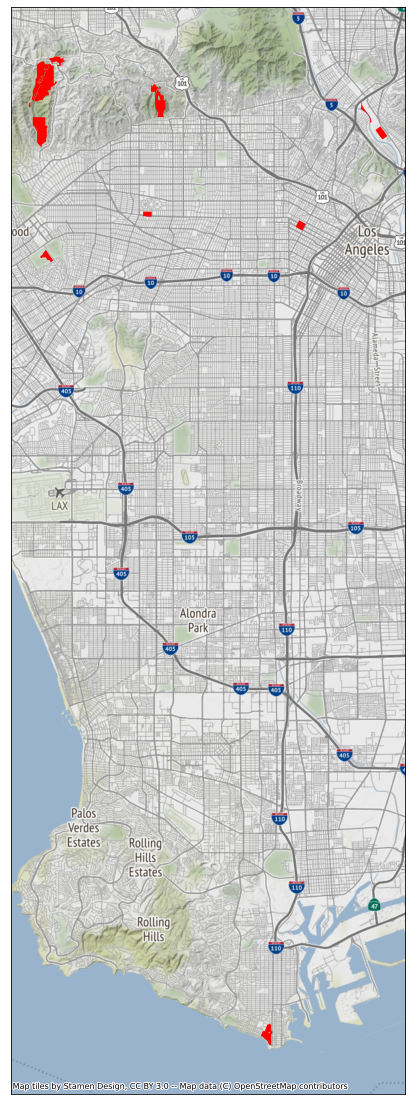

In [25]:
# Tags on map
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
park_shapes.to_crs('EPSG:3857').plot(color='r', ax=ax) # remember, 3857 is Web Mercator

# let's add a basemap using the contextily library
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])

In [24]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

[Text(0.5, 1.0, 'Cultural Ecosystem Services by Park')]

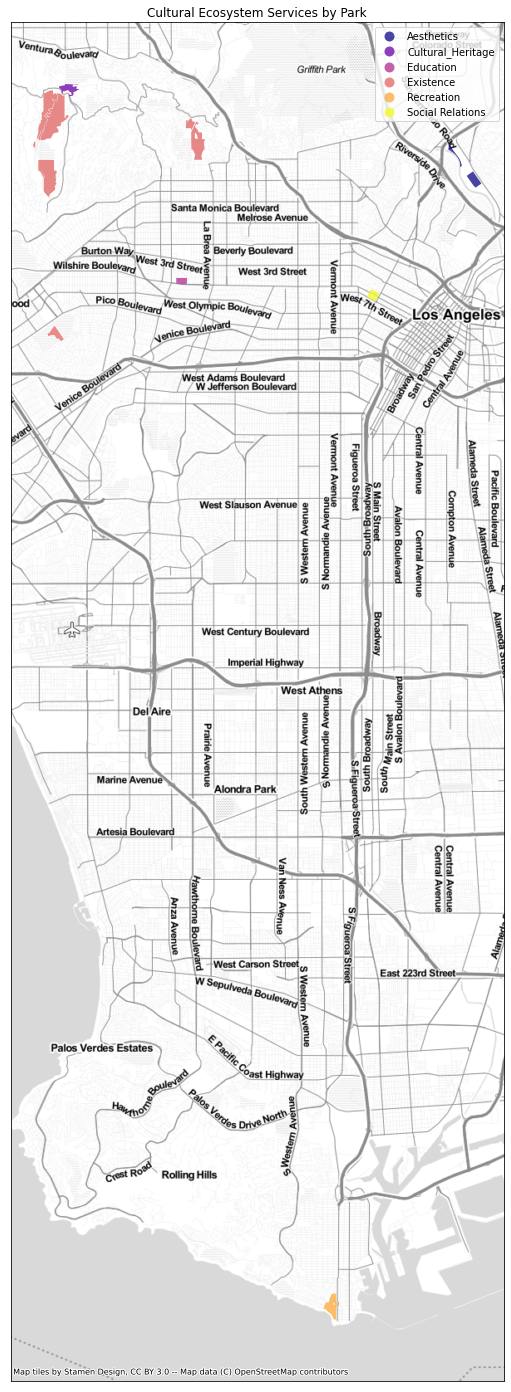

In [38]:
#import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(25,25))

# basemaps are typically in Web Mercator (projection 3857), so we need to reproject our dataframe to this
# alpha sets the transparency
park_shapes.to_crs('EPSG:3857').plot('Top_CES', cmap='plasma', legend=True, ax = ax, alpha=.75)


# let's add a basemap using the contextily library
# a bell and whistle I added here was to use a different basemap, so that the income data are not overwhelmed
# see here for examples: https://contextily.readthedocs.io/en/latest/providers_deepdive.html
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])

ax.set(title='Cultural Ecosystem Services by Park')

# save to a file
#fig.savefig('med_inc.png')

Looking at the map of donimant CES 

# Past attempts

In [ ]:
#importing parks csv
import pandas as pd

# You might need to add a path as well
fn = 'parks_data.csv'
parks_data = pd.read_csv(fn)
parks_data.head()

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
swords += ['losangeles', 'la', 'losangelesca', 'ca', 'macarthur', 'macarthurpark', 'woodley', 'riodelosangeles', 'runyoncanyon', 
           'temescalgateway', 'heidelbergpark', 'hancockpark', 'franklincanyonpark', 'franklincanyonpark', 'angelsgate', 
           'coldwatercanyon', 'chatsworthparksouth','cheviothills', 'california', 'usa', 'southerncalifornia', 'park', 'parklabrea', 
          'unitedstates', 'america']

def clean_string(text):
    # remove punctuation
    text = re.sub(r"[^A-z\s]", "", text)
    
    cleaned_list_of_words = [word for word in word_tokenize(text.lower()) if word not in swords] #return a string or apply to all tags
    
    return cleaned_list_of_words

#calling the function to only apply to the tags column 
parks_data['tags'] = parks_data['tags'].apply(clean_string)


In [ ]:
parks_data
parks_data.parkname.unique()

# category map codes by park

In [ ]:
category_CES = ['Existence','Recreation','Social Relations','Aesthetics', 'Knowledge Systems',
              'Inspiration', 'Cultural Heritage','Education', 'Sense of Place','Cultural Diversity','Spiritual']

In [ ]:
# Franklin Canyon Park
category_map_franklincanyon = { 'Existence': ['santamonicamountains','franklincanyonlake','losangelesmountains','mayberrylake','myerslake','grass','lake','trees','ducks','water','evergreens','frog','woods'], 
                               'Recreation': ['rustythedog','canine','chihuahuamix','mutt','dog','pet','weeksfordogs','urbanhiking'],
                               'Social Relations':[],
                               'Aesthetics':['sky'], 
                               'Knowledge Systems':[],
                               'Inspiration':[], 
                               'Cultural Heritage':[],
                               'Education':[], 
                               'Sense of Place':[],
                               'Cultural Diversity':[],
                               'Spiritual':['nature','neature']}

In [ ]:
# Hancock park
category_map_hancockpark = { 'Existence': ['garden','parks',], 
                               'Recreation': ['gardentour','fish'],
                               'Social Relations':['gardenparty','people','picnik'],
                               'Aesthetics':[], 
                               'Knowledge Systems':[],
                               'Inspiration':[], 
                               'Cultural Heritage':['sculpture','art','statue'],
                               'Education':['georgecpagemuseum','museums','losangelescountymuseumofart','iceage','pleistocene','skeletons',
                                            'skulls','pit','tarpits','labreatarpits','labrea','museum','pagemuseum','fossils','bones','paleontology',
                                           'lacma','animalsmammoths','excavation','sabretooth','tigers','giantgroundsloths','gettyhouse',
                                           'tar','sabretoothtigers','olympusem','skeleton','fossil','mammoth','mastodon'], 
                               'Sense of Place':[],
                               'Cultural Diversity':['lapride','westhollywoodpride','lagaypride','westhollywoodgaypride','losangelespride',
                                                     'losangelesgaypride','pride','gaypride'],
                               'Spiritual':['treasuresoflosangelesarchitecture']}

In [ ]:
# Rio del Los Angeles Park
category_map_riodellosangeles = { 'Existence': ['lariver','losangelesriver','grass'], 
                               'Recreation': ['campout'],
                               'Social Relations':['walkathon','earthday'],
                               'Aesthetics':[], 
                               'Knowledge Systems':[],
                               'Inspiration':[], 
                               'Cultural Heritage':['losangelesstatehistoricpark'],
                               'Education':['environmentaljustice','urbanparkmovement'], 
                               'Sense of Place':[],
                               'Cultural Diversity':[],
                               'Spiritual':['outside']}
#note: I recategorized grass into existence instead of aesthetics....

In [ ]:
# Runyon Canyon Park
category_map_runyon = { 'Existence': ['mountains','canyons','hills','mountains','hill','horse'], 
                               'Recreation': ['hiking','hike','sunriserunyon','sunriseinrunyon','sunriseinrunyoncanyonpark',
                                              'trail','observatory','run','jog'],
                               'Social Relations':[],
                               'Aesthetics':['textures','texturemaps','texturemap','texture','sunset','sky','skyline',
                                             'clouds','sun','weather','sunrise','pacificocean','panorama','color'], 
                               'Knowledge Systems':[],
                               'Inspiration':[], 
                               'Cultural Heritage':[],
                               'Education':[], 
                               'Sense of Place':[],
                               'Cultural Diversity':[],
                               'Spiritual':[]}

In [ ]:
# Coldwater Canyon Park
category_map_runyon = { 'Existence': ['tujungawashgreenway','tujungawash','pacificocean'], 
                               'Recreation': ['summerolympics'],
                               'Social Relations':['zurbulon'],
                               'Aesthetics':['overlook','sunset','viewpoint','scenicoverview','mulhollandscenicoverview',
                                             'brown','barbaraafineoverlook','lasunset','midcenturymodernhomes'], 
                               'Knowledge Systems':['lahistory','californiahistory'],
                               'Inspiration':['mural'], 
                               'Cultural Heritage':['charliechaplin'],
                               'Education':['losangelespubliclibrary'], 
                               'Sense of Place':[],
                               'Cultural Diversity':[],
                               'Spiritual':['church','littlebrownchurchinthevalley']}

In [ ]:
# Cheviot Hills Park
category_map_cheviothills = { 'Existence': ['sky','weather','tree','cloudy'], 
                               'Recreation': ['westerncup','sports','quidditch','nikon','nikond','dog','puggle',
                                              'puppy','referee','boat'],
                               'Social Relations':['harrypotter','wand'],
                               'Aesthetics':['green','landscape'], 
                               'Knowledge Systems':[],
                               'Inspiration':[], 
                               'Cultural Heritage':['parlance'],
                               'Education':[], 
                               'Sense of Place':['geeks','geek','neighborhood'],
                               'Cultural Diversity':[],
                               'Spiritual':[]}

# importing shape file
https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/

In [23]:
import shapefile as shp
#/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp

# opening the vector map
shp_path = "/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp"
assert os.path.exists(shp_path), "Input file does not exist."

# reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

# CES visualization 

In [59]:
category_map = { 'Existence': ['westlake', 'lake','palmtrees','palms','elks','parkplaza','birds','palmtree', 'santamonicamountains','franklincanyonlake','losangelesmountains','mayberrylake','myerslake','grass','lake','trees','ducks','water','evergreens','frog','woods', 'ice', 'fluids','iceblocks','blocksofice','wallofice','harbor', 'sky', 'weather','tree','cloudy','garden','parks','lariver','losangelesriver','grass','mountains','canyons','hills','mountains','hill','horse','tujungawashgreenway','tujungawash','pacificocean','sky','weather','tree','cloudy'], 
                'Recreation': ['music','bikes','lilihaydn','bicycles','violin','ciclovia','loslobos','event', 'rustythedog','canine','chihuahuamix','mutt','dog','pet','weeksfordogs','urbanhiking', 'costumes', 'costume', 'cosplay', 'boomerang', 'lighthouse','westerncup','sports', 'quidditch', 'dog', 'puggle', 'puppy', 'referee', 'boat', 'nikon', 'nikond','gardentour','fish','campout','hiking','hike','sunriserunyon','sunriseinrunyon','sunriseinrunyoncanyonpark','trail','observatory','run','jog','summerolympics','westerncup','sports','quidditch','nikon','nikond','dog','puggle','puppy','referee','boat'], 
                'Social Relations': ['ciclavia','rally','protest','keepfamliestogethor','tamale','asada','alpastor','march','carnitas','eltaurino','burrito','thegreattacohunt','lasantacon','people','tacos','food','harrypotter', 'wand', 'geeks', 'geek','gardenparty','people','picnik','walkathon','earthday','zurbulon','harrypotter','wand'],
                'Aesthetics': ['colorful','green', 'landscape','textures','texturemaps','texturemap','texture','sunset','sky','skyline','clouds','sun','weather','sunrise','pacificocean','panorama','color','overlook','sunset','viewpoint','scenicoverview','mulhollandscenicoverview','brown','barbaraafineoverlook','lasunset','green','landscape'],
                'Spiritual': ['signs','sanity','nature','neature','harborinterfaith','outside','church','littlebrownchurchinthevalley'], 
                'Inspiration':['art','portraitsofhope','publicart', 'artonthewaterfront', 'artist', 'sculpture', 'printmaking', 'portrait', 'contemporaryart', 'painting', 'polaroid', 'draw', 'photographer', 'studioartist', 'prints','mural'],
                'Cultural Heritage': ['landmark','monument', 'curlettandbeelman','fortmacarthur','warreinactment', 'agcc', 'angelsgateculturalcenter', 'openstudios', 'allankaprow', 'gallerya', 'artgallery', 'gallery', 'artexhibition', 'slobodandimitrov', 'culturalcenter', 'exhibition', 'downstairsgallery', 'installation', 'hillarybradfield', 'festival','parlance','sculpture','art','statue','treasuresoflosangelesarchitecture','losangelesstatehistoricpark','midcenturymodernhomes','charliechaplin','parlance'],
                'Sense of Place': ['neighborhood','community','eccideasclub', 'sanpedro', 'neighborhood'], 
                'Cultural Diversity': ['mexican','lengua','march','immigration','czechart','lapride','westhollywoodpride','lagaypride','westhollywoodgaypride','losangelespride','losangelesgaypride','pride','gaypride'],
                'Knowledge Systems': ['historyofsanpedropunk', 'belleepoque','lahistory','californiahistory'],
                'Education': ['portoflosangeles', 'port','portofla','marshallastor','berth','georgecpagemuseum','museums','losangelescountymuseumofart','iceage','pleistocene','skeletons','skulls','pit','tarpits','labreatarpits','labrea','museum','pagemuseum','fossils','bones','paleontology','lacma','animalsmammoths','excavation','sabretooth','tigers','giantgroundsloths','gettyhouse','tar','sabretoothtigers','olympusem','skeleton','fossil','mammoth','mastodon','environmentaljustice','urbanparkmovement','losangelespubliclibrary'
                             ]}

# Import the csv of frequencies for each park under consideration
fns = ['top_tags_angelsgate.csv','top_tags_cheviothills.csv','top_tags_coldwatercanyon.csv',
       'top_tags_franklincanyonpark.csv','top_tags_hancockpark.csv','top_tags_macarthur.csv',
       'top_tags_riodelosangeles.csv','top_tags_runyoncanyon.csv']
parks_frequency = []
for fn in fns: 
    parks_frequency.append(pd.read_csv(fn))

#print(parks_frequency)

# Create a function to loop over the categories and sum the words associated with each category  
def getCategories(frequencyDf):
    
    category_frequencies = dict.fromkeys(category_map,0)
    
    for index, row in frequencyDf.iterrows():
        #print(row['tags'],row['value'])
        for category_name in category_map:
            wordlist = category_map[category_name]
            if row['tags'] in wordlist:
                category_frequencies[category_name]+=row['value']
            
    return category_frequencies
    
# Create a list of dictionaries with the frequencies by category for each park
cat_frequencies = []
for park in parks_frequency:
    cat_frequencies.append(getCategories(park))

print(cat_frequencies)

[{'Existence': 325, 'Recreation': 48, 'Social Relations': 0, 'Aesthetics': 10, 'Spiritual': 7, 'Inspiration': 412, 'Cultural Heritage': 1305, 'Sense of Place': 50, 'Cultural Diversity': 7, 'Knowledge Systems': 17, 'Education': 120}, {'Existence': 4, 'Recreation': 78, 'Social Relations': 43, 'Aesthetics': 5, 'Spiritual': 0, 'Inspiration': 0, 'Cultural Heritage': 14, 'Sense of Place': 1, 'Cultural Diversity': 0, 'Knowledge Systems': 0, 'Education': 0}, {'Existence': 33, 'Recreation': 1, 'Social Relations': 2, 'Aesthetics': 9, 'Spiritual': 2, 'Inspiration': 14, 'Cultural Heritage': 2, 'Sense of Place': 0, 'Cultural Diversity': 0, 'Knowledge Systems': 27, 'Education': 1}, {'Existence': 64, 'Recreation': 44, 'Social Relations': 0, 'Aesthetics': 1, 'Spiritual': 11, 'Inspiration': 2, 'Cultural Heritage': 0, 'Sense of Place': 0, 'Cultural Diversity': 0, 'Knowledge Systems': 0, 'Education': 0}, {'Existence': 69, 'Recreation': 58, 'Social Relations': 189, 'Aesthetics': 0, 'Spiritual': 0, 'Inspir

In [67]:
import pandas as pd

parksdf = pd.DataFrame(cat_frequencies)
print(parksdf)

   Existence  Recreation  Social Relations  Aesthetics  Spiritual  \
0        325          48                 0          10          7   
1          4          78                43           5          0   
2         33           1                 2           9          2   
3         64          44                 0           1         11   
4         69          58               189           0          0   
5        455         166               567          25         37   
6         14           6                13           0          1   
7         91         156                 0         731          0   

   Inspiration  Cultural Heritage  Sense of Place  Cultural Diversity  \
0          412               1305              50                   7   
1            0                 14               1                   0   
2           14                  2               0                   0   
3            2                  0               0                   0   
4           7

In [83]:
# create list of park names as they appear in shp file

parknames = ['Angels Gate Park','Cheviot Hills Park and Recreation Center','Coldwater Canyon Park','Franklin Canyon Park','Hancock Park','MacArthur Park','Rio de Los Angeles State Park State Recreation Area','Runyon Canyon Park']

parknamesDf = pd.DataFrame(parknames)
parknamesDf['PARK_NAME']=parknames
parknamesDf

,0,PARK_NAME
0,Angels Gate Park,Angels Gate Park
1,Cheviot Hills Park and Recreation Center,Cheviot Hills Park and Recreation Center
2,Coldwater Canyon Park,Coldwater Canyon Park
3,Franklin Canyon Park,Franklin Canyon Park
4,Hancock Park,Hancock Park
5,MacArthur Park,MacArthur Park
6,Rio de Los Angeles State Park State Recreation...,Rio de Los Angeles State Park State Recreation...
7,Runyon Canyon Park,Runyon Canyon Park


In [84]:
# add parknamesDf as a column to parksDf
parksjoinDf = parksdf.join(parknamesDf, how = 'left')
parksjoinDf

,Existence,Recreation,Social Relations,Aesthetics,Spiritual,Inspiration,Cultural Heritage,Sense of Place,Cultural Diversity,Knowledge Systems,Education,0,PARK_NAME
0,325,48,0,10,7,412,1305,50,7,17,120,Angels Gate Park,Angels Gate Park
1,4,78,43,5,0,0,14,1,0,0,0,Cheviot Hills Park and Recreation Center,Cheviot Hills Park and Recreation Center
2,33,1,2,9,2,14,2,0,0,27,1,Coldwater Canyon Park,Coldwater Canyon Park
3,64,44,0,1,11,2,0,0,0,0,0,Franklin Canyon Park,Franklin Canyon Park
4,69,58,189,0,0,75,137,0,928,0,4027,Hancock Park,Hancock Park
5,455,166,567,25,37,76,150,98,146,0,0,MacArthur Park,MacArthur Park
6,14,6,13,0,1,0,6,0,0,0,12,Rio de Los Angeles State Park State Recreation...,Rio de Los Angeles State Park State Recreation...
7,91,156,0,731,0,3,0,0,0,0,0,Runyon Canyon Park,Runyon Canyon Park


# join parksjoinDf to parks geodataframe

In [108]:

# https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

import shapefile as shp
#/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp

# opening the vector map
shp_path = "/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp"
assert os.path.exists(shp_path), "Input file does not exist."

# reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape

(8, 5)

In [109]:
df.sample(5)

,ACCESS_TYP,PARK_NAME,ACRES,Area_HA,coords
2,Open Access,Angels Gate Park,70.474,28.520115,"[(158289.47544005618, -476568.55305057834), (1..."
7,Open Access,Rio de Los Angeles State Park State Recreation...,54.853,22.198228,"[(163040.14474247978, -433874.72913930716), (1..."
0,Open Access,Cheviot Hills Park and Recreation Center,34.169,13.827699,"[(146843.4650470144, -439567.4333686195), (147..."
5,Open Access,MacArthur Park,31.716,12.834977,"[(159231.29358860163, -438119.4095837819), (15..."
4,Open Access,Hancock Park,23.098,9.347420,"[(151869.12581823242, -437840.07501065434), (1..."


In [117]:
#set index to srprec for both dfs

#df.set_index('PARK_NAME', inplace=True)
#parksjoinDf.set_index('PARK_NAME', inplace=True)

# join
parksmap = df.join(parksjoinDf, on = 'PARK_NAME', how = 'left')
parksmap
parksmap.head()

,ACCESS_TYP,PARK_NAME,ACRES,Area_HA,coords,Existence,Recreation,Social Relations,Aesthetics,Spiritual,Inspiration,Cultural Heritage,Sense of Place,Cultural Diversity,Knowledge Systems,Education,0
0,Open Access,Cheviot Hills Park and Recreation Center,34.169,13.827699,"[(146843.4650470144, -439567.4333686195), (147...",4,78,43,5,0,0,14,1,0,0,0,Cheviot Hills Park and Recreation Center
1,Open Access,Franklin Canyon Park,594.314,199.616109,"[(146712.01146184257, -433272.3679031596), (14...",64,44,0,1,11,2,0,0,0,0,0,Franklin Canyon Park
2,Open Access,Angels Gate Park,70.474,28.520115,"[(158289.47544005618, -476568.55305057834), (1...",325,48,0,10,7,412,1305,50,7,17,120,Angels Gate Park
3,Open Access,Coldwater Canyon Park,41.807,16.918901,"[(147572.3033143758, -430391.8732043633), (147...",33,1,2,9,2,14,2,0,0,27,1,Coldwater Canyon Park
4,Open Access,Hancock Park,23.098,9.347420,"[(151869.12581823242, -437840.07501065434), (1...",69,58,189,0,0,75,137,0,928,0,4027,Hancock Park


In [121]:
Top_CES = ["Recreation","Existence","Cultural_Heritage","Existence","Education","Social Relations","Aesthetics","Existence"]
parksmap['Top_CES']=Top_CES
parksmap

,ACCESS_TYP,ACRES,Area_HA,coords,Existence,Recreation,Social Relations,Aesthetics,Spiritual,Inspiration,Cultural Heritage,Sense of Place,Cultural Diversity,Knowledge Systems,Education,0,Top_CES
PARK_NAME,,,,,,,,,,,,,,,,,
Cheviot Hills Park and Recreation Center,Open Access,34.169,13.827699,"[(146843.4650470144, -439567.4333686195), (147...",4,78,43,5,0,0,14,1,0,0,0,Cheviot Hills Park and Recreation Center,Recreation
Franklin Canyon Park,Open Access,594.314,199.616109,"[(146712.01146184257, -433272.3679031596), (14...",64,44,0,1,11,2,0,0,0,0,0,Franklin Canyon Park,Existence
Angels Gate Park,Open Access,70.474,28.520115,"[(158289.47544005618, -476568.55305057834), (1...",325,48,0,10,7,412,1305,50,7,17,120,Angels Gate Park,Cultural_Heritage
Coldwater Canyon Park,Open Access,41.807,16.918901,"[(147572.3033143758, -430391.8732043633), (147...",33,1,2,9,2,14,2,0,0,27,1,Coldwater Canyon Park,Existence
Hancock Park,Open Access,23.098,9.347420,"[(151869.12581823242, -437840.07501065434), (1...",69,58,189,0,0,75,137,0,928,0,4027,Hancock Park,Education
MacArthur Park,Open Access,31.716,12.834977,"[(159231.29358860163, -438119.4095837819), (15...",455,166,567,25,37,76,150,98,146,0,0,MacArthur Park,Social Relations
Runyon Canyon Park,Open Access,133.203,53.905646,"[(152208.8763379217, -431794.06908737053), (15...",91,156,0,731,0,3,0,0,0,0,0,Runyon Canyon Park,Aesthetics
Rio de Los Angeles State Park State Recreation Area,Open Access,54.853,22.198228,"[(163040.14474247978, -433874.72913930716), (1...",14,6,13,0,1,0,6,0,0,0,12,Rio de Los Angeles State Park State Recreation...,Existence


In [131]:
#turn parkmaps into a geodataframe
#parksmap['coords'].head()
#parksmap.plot(column='Top_CES')
type(parksmap)

pandas.core.frame.DataFrame

In [136]:
# convert coords to string
parksmap['coords'] = parksmap['coords'].astype(str)

In [138]:
parksmap['coords'] = gpd.GeoSeries.from_wkt(parksmap['coords'])
my_geo_df = gpd.GeoDataFrame(parksmap, geometry='coords')

ParseException: Unknown type: '['


WKTReadingError: Could not create geometry because of errors while reading input.

NameError: name 'parkmaps' is not defined

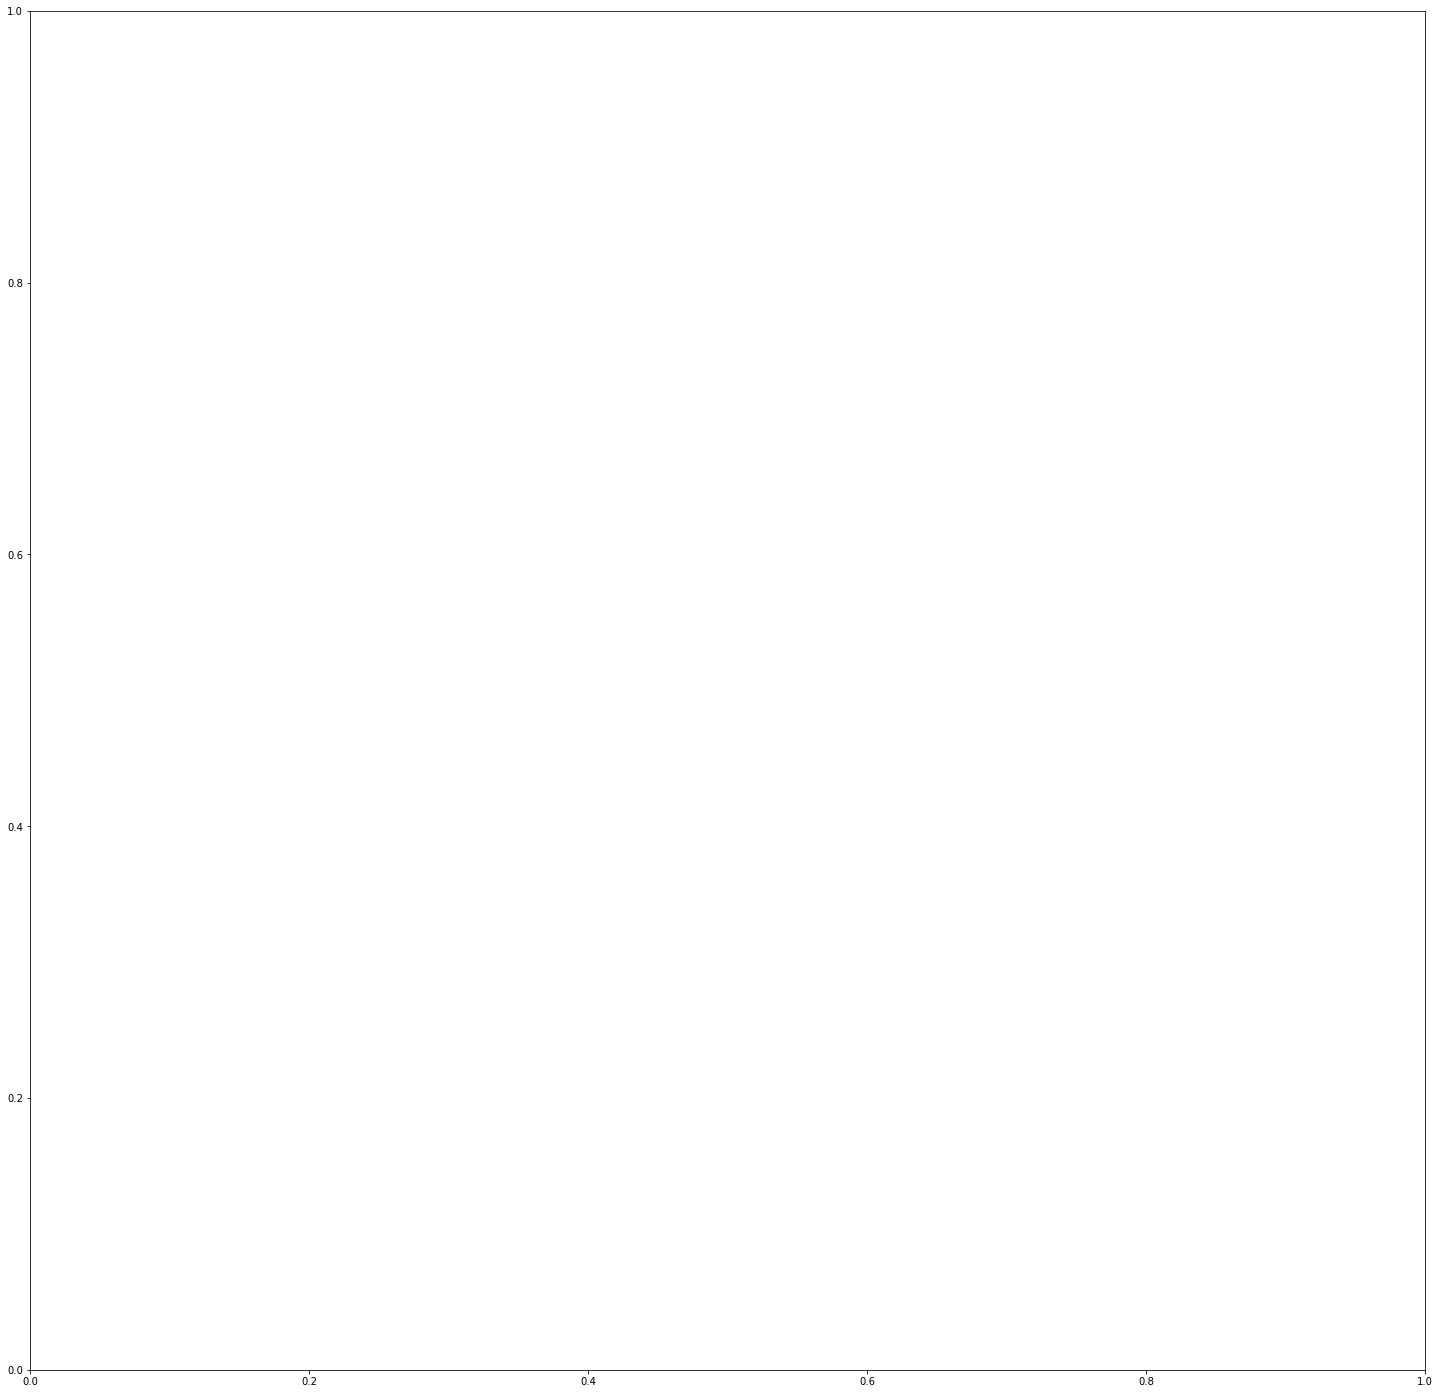

In [141]:

#import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(25,25))

# basemaps are typically in Web Mercator (projection 3857), so we need to reproject our dataframe to this
# alpha sets the transparency
parkmaps.to_crs('EPSG:3857').plot('Top_CES', cmap='plasma', legend=True, ax = ax, alpha=.2)

In [1]:
# Import necessary modules
import geopandas as gpd

# Set filepath (fix path relative to yours)
fp = "/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

ModuleNotFoundError: No module named 'geopandas'

In [114]:
ces_list = ["Recreation","Existence","Cultural_Heritage","Existence","Education","Social Relations","Aesthetics","Existence"]

cesDf = pd.DataFrame(ces_list)
cesDf['Top_CES']=cesDf
cesDf

# add park name column to cesDf
cesDf['PARK_NAME'] = parknames
cesDf

,0,Top_CES,PARK_NAME
0,Recreation,Recreation,Angels Gate Park
1,Existence,Existence,Cheviot Hills Park and Recreation Center
2,Cultural_Heritage,Cultural_Heritage,Coldwater Canyon Park
3,Existence,Existence,Franklin Canyon Park
4,Education,Education,Hancock Park
5,Social Relations,Social Relations,MacArthur Park
6,Aesthetics,Aesthetics,Rio de Los Angeles State Park State Recreation...
7,Existence,Existence,Runyon Canyon Park


In [120]:
#cesDf.set_index('PARK_NAME', inplace=True)
#parksmap.set_index('PARK_NAME',inplace=True)
parksmap2 = parksmap(cesDf, on = 'PARK_NAME', how = 'left')

TypeError: 'DataFrame' object is not callable

In [97]:
# create a list of corresponding dominant CES and add it as a column

# create a list of conditions
conditions = [
    (parksmap['Existence']>parksmap['Recreation']) | (parksmap['Existence']>parksmap['Social Relations'])
    | (parksmap['Existence']>parksmap['Social Relations']) | (parksmap['Existence']>parksmap['Aesthetics'])
    | (parksmap['Existence']>parksmap['Spiritual']) | (parksmap['Existence']>parksmap['Inspiration']) | 
    (parksmap['Existence']>parksmap['Cultural Heritage']) | (parksmap['Existence']>parksmap['Sense of Place'])
    | (parksmap['Existence']>parksmap['Cultural Diversity']) | (parksmap['Existence']>parksmap['Knowledge Systems'])
    | (parksmap['Existence']>parksmap['Education'])
    (parksmap['Recreation']>parksmap['Existence']) | (parksmap['Recreation']>parksmap['Social Relations'])
    | (parksmap['Recreation']>parksmap['Social Relations']) | (parksmap['Recreation']>parksmap['Aesthetics'])
    | (parksmap['Recreation']>parksmap['Spiritual']) | (parksmap['Recreation']>parksmap['Inspiration']) | 
    (parksmap['Recreation']>parksmap['Cultural Heritage']) | (parksmap['Recreation']>parksmap['Sense of Place'])
    | (parksmap['Recreation']>parksmap['Cultural Diversity']) | (parksmap['Recreation']>parksmap['Knowledge Systems'])
    | (parksmap['Recreation']>parksmap['Education'])
    #(parksmap['Recreation']>parksmap['Existence'],parksmap['Social Relations'],parksmap['Social Relations'],
    #parksmap['Aesthetics'],parksmap['Spiritual'],parksmap['Inspiration'],parksmap['Cultural Heritage'],
    #parksmap['Sense of Place'],parksmap['Cultural Diversity'],parksmap['Knowledge Systems'],parksmap['Education']))
]
values =['Existence','Recreation']
#values =['Existence','Recreation']

parksmap['Top_CES'] = np.select(conditions,values)
parksmap

TypeError: 'Series' object is not callable

In [80]:
# this didn't work :/
# change column name to PARK_NAME

parksjoinDf.rename(columns={"0":"PARK_NAME"})

,Existence,Recreation,Social Relations,Aesthetics,Spiritual,Inspiration,Cultural Heritage,Sense of Place,Cultural Diversity,Knowledge Systems,Education,0
0,325,48,0,10,7,412,1305,50,7,17,120,Angels Gate Park
1,4,78,43,5,0,0,14,1,0,0,0,Cheviot Hills Park and Recreation Center
2,33,1,2,9,2,14,2,0,0,27,1,Coldwater Canyon Park
3,64,44,0,1,11,2,0,0,0,0,0,Franklin Canyon Park
4,69,58,189,0,0,75,137,0,928,0,4027,Hancock Park
5,455,166,567,25,37,76,150,98,146,0,0,MacArthur Park
6,14,6,13,0,1,0,6,0,0,0,12,Rio de Los Angeles State Park State Recreation...
7,91,156,0,731,0,3,0,0,0,0,0,Runyon Canyon Park


In [61]:
from itertools import chain

#print list(chain(*cat_frequencies))
# or better: (available since Python 2.6)
print list(chain.from_iterable(cat_frequencies))

SyntaxError: invalid syntax (<ipython-input-61-90d60260d9b9>, line 5)

# visualize shape file

In [44]:
pip install seaborn

     |████████████████████████████████| 285 kB 8.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

import shapefile as shp
#/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp

# opening the vector map
shp_path = "/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp"
assert os.path.exists(shp_path), "Input file does not exist."

# reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape

(8, 5)

In [140]:
df.sample(5)
df.coords

0    [(146843.4650470144, -439567.4333686195), (147...
1    [(146712.01146184257, -433272.3679031596), (14...
2    [(158289.47544005618, -476568.55305057834), (1...
3    [(147572.3033143758, -430391.8732043633), (147...
4    [(151869.12581823242, -437840.07501065434), (1...
5    [(159231.29358860163, -438119.4095837819), (15...
6    [(152208.8763379217, -431794.06908737053), (15...
7    [(163040.14474247978, -433874.72913930716), (1...
Name: coords, dtype: object

In [48]:
df.PARK_NAME

0             Cheviot Hills Park and Recreation Center
1                                 Franklin Canyon Park
2                                     Angels Gate Park
3                                Coldwater Canyon Park
4                                         Hancock Park
5                                       MacArthur Park
6                                   Runyon Canyon Park
7    Rio de Los Angeles State Park State Recreation...
Name: PARK_NAME, dtype: object

In [49]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [54]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (20,40)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

function

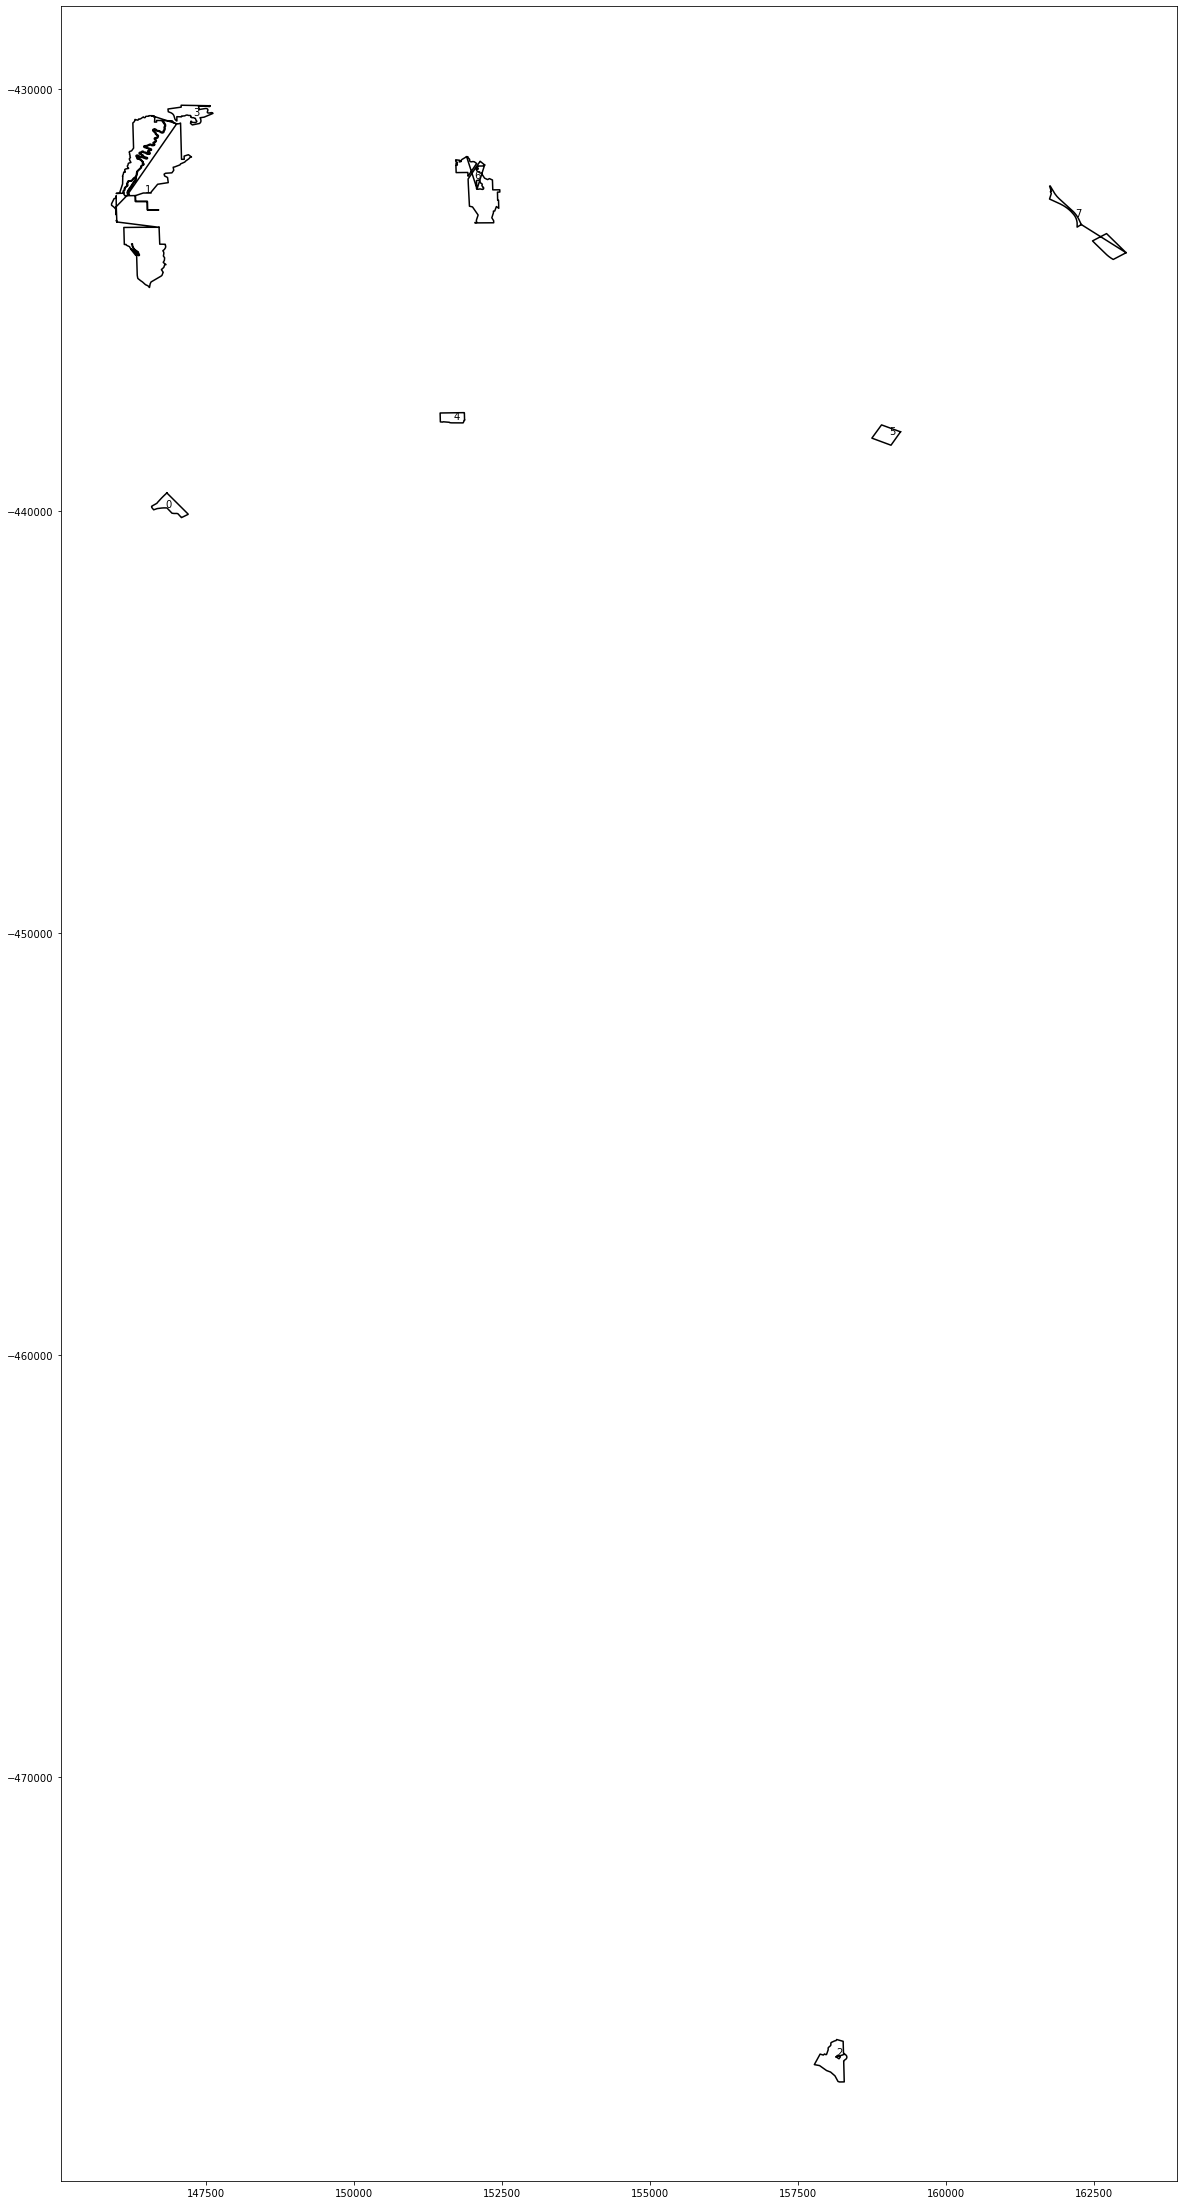

In [139]:
plot_map(sf)
type(plot_map)

# join frequency data to shp file frame to get dominate CES

In [56]:
# https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

import shapefile as shp
#/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp

# opening the vector map
shp_path = "/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp"
assert os.path.exists(shp_path), "Input file does not exist."

# reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)
df.shape

(8, 5)

In [57]:
df.sample(5)

,ACCESS_TYP,PARK_NAME,ACRES,Area_HA,coords
4,Open Access,Hancock Park,23.098,9.347420,"[(151869.12581823242, -437840.07501065434), (1..."
2,Open Access,Angels Gate Park,70.474,28.520115,"[(158289.47544005618, -476568.55305057834), (1..."
1,Open Access,Franklin Canyon Park,594.314,199.616109,"[(146712.01146184257, -433272.3679031596), (14..."
7,Open Access,Rio de Los Angeles State Park State Recreation...,54.853,22.198228,"[(163040.14474247978, -433874.72913930716), (1..."
5,Open Access,MacArthur Park,31.716,12.834977,"[(159231.29358860163, -438119.4095837819), (15..."


# past mapping attempts

In [30]:
# Tags on map
import contextily as ctx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
sf.to_crs('EPSG:3857').plot(color='r', ax=ax) # remember, 3857 is Web Mercator

# let's add a basemap using the contextily library
ctx.add_basemap(ax, zoom=12)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])

ImportError: dlopen(/Users/morganrogers/opt/anaconda3/envs/UP229/lib/python3.7/site-packages/rasterio/_base.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libtbb.dylib
  Referenced from: /Users/morganrogers/opt/anaconda3/envs/UP229/lib/libtiledb.dylib
  Reason: image not found

In [29]:
print(cat_frequencies.keys())

AttributeError: 'list' object has no attribute 'keys'

In [26]:
# Source: https://plotly.com/python/radar-chart/
import plotly.graph_objects as go

fig = go.Figure()

for category in cat_frequencies:
    # compute frequency total per park
    park_freq_total = sum(list(category.values()))
    r_values = [x/park_freq_total for x in list(category.values())]
    fig.add_trace(go.Scatterpolar(
          r=r_values, #This is a method
          theta=list(category.keys()),
          fill='toself',
          name=''
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.8]
    )),
  showlegend=True
)
    
fig.show()

ModuleNotFoundError: No module named 'plotly'

# Failed attempts at importing shape file

In [17]:
import geopandas as gdp 
import pandas as pd

#read in csv file

fn = 'ces_park_shapes.csv'
parks_sf = pd.read_csv(fn)
parks_sf.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,Unnamed: 0,ACCESS_TYP,PARK_NAME,ACRES,Area_HA,geometry
1,Open Access,Cheviot Hills Park and Recreation Center,34.169,13.827698843,list(list(c(146843.465047014,147202.287508,147203.212876,147201.117994814,147089.962550874,147082.875381432,147030.621098821,147013.504228483,146964.274991994,146964.193423272,146929.744187,146845.577392,146793.996803,146756.081844381,146681.100516958,146620.887760921,146588.475654592,146585.814746439,146586.328903782,146592.343554,146597.291752195,146597.329360,146675.241284322,146686.038609673,146686.067541862,146751.297920,146751.306875,146785.556919611,
146785.559464165,146843.465047014,-439567.433368619,-440068.356578729,-440072.757099275,-440076.436434208,-440152.044684,-440141.202409,-440061.261425131,-440053.861742074,-440054.432291792,-440054.433269563,-440047.680742999,-439923.240445342,-439921.832640055,-439925.231554,-439938.551574,-439967.541173,-439912.288468569,-439885.54546023,-439885.04588616,-439879.201831952,-439874.393981826,-439874.364353402,-439812.948854,-439792.457851371,-439792.413659,,NaN,NaN,NaN,NaN,NaN,NaN
-439692.876967773,-439692.863782535,-439644.172828062,-439644.16933529,-439567.433368619))),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Open Access,Franklin Canyon Park,594.314,199.616109313,list(list(c(146712.011461843,146723.258605,146815.877787,146815.850162708,146819.357750788,146823.941848806,146822.487817112,146819.877273811,146812.975815067,146812.969719296,146812.960358,146810.075009,146809.818900,146807.14844722,146806.823225999,146806.431258584,146806.025232665,146805.605339848,146805.172733891,146804.951226,146804.726373516,146804.498180,146804.266581557,146801.556129831,146801.096486742,146797.788423,146797.419113,146785.72975387,
146780.938184029,146780.573784379,146779.583310954,146778.567184209,146778.506293962,146778.447130308,146778.002071,146777.899533,146777.800531863,146777.705068901,146777.613142427,146777.28226346,146777.174741902,146777.044632818,146777.039794874,146777.012113,146776.899881,146776.803030,146776.76023284,146776.685991899,146776.658439933,146776.655520494,146776.633570597,146776.628575153,146776.610807,146776.605441194,146776.569029,146776.545250978,,NaN,NaN,NaN,NaN,NaN


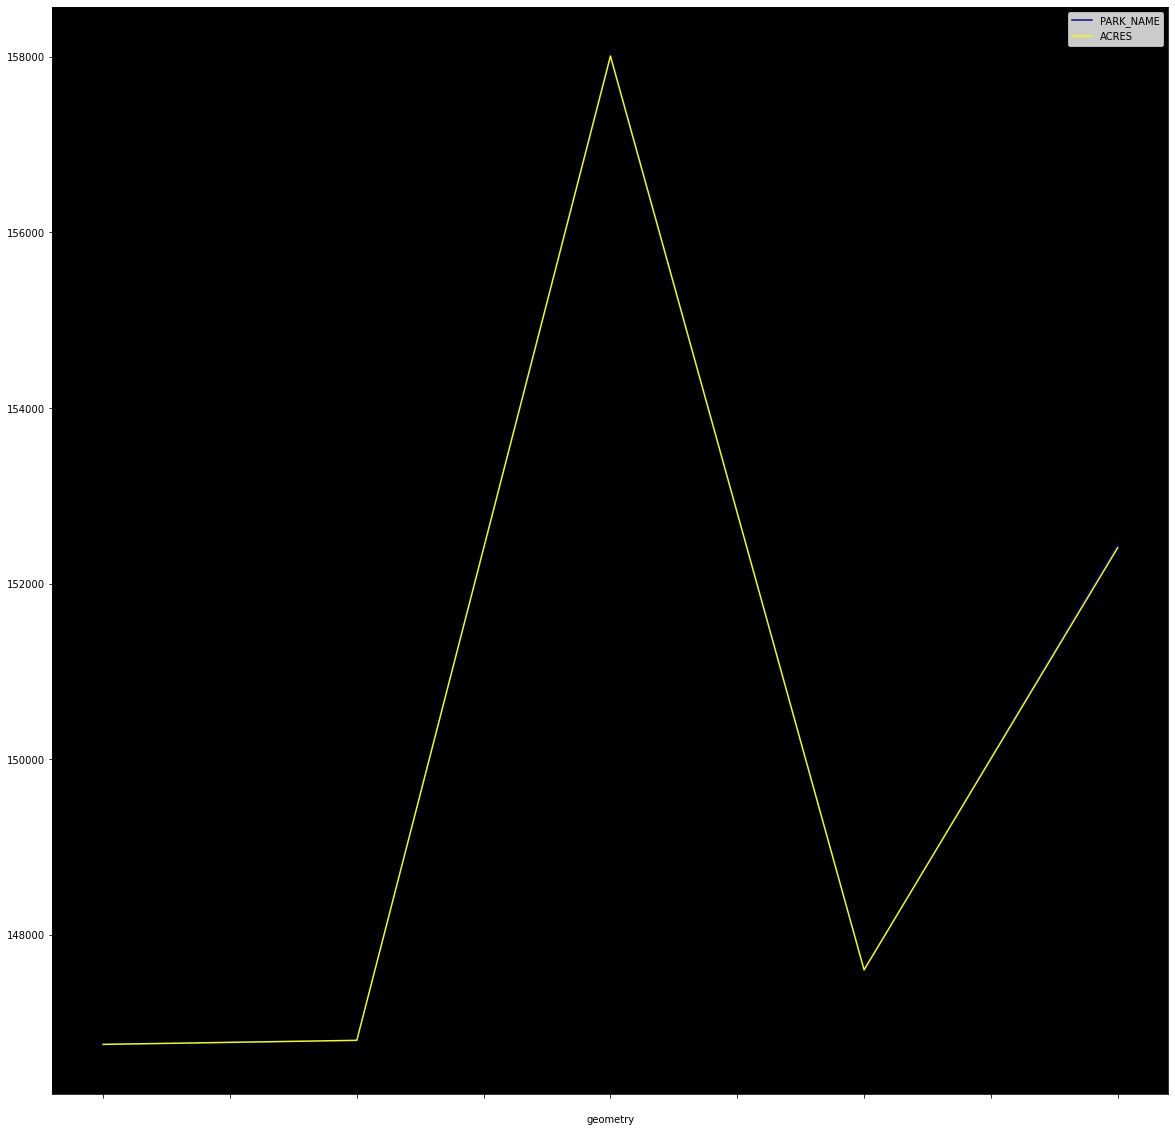

In [20]:
f, ax = plt.subplots(1,1,figsize=(20,20))
parks_sf.dropna(subset=['geometry'], axis=0).plot('geometry', ax=ax, cmap='plasma')
ax.set_facecolor('k')

In [21]:
import fiona
sjer_plot_locations = gpd.read_file('Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp')

ImportError: dlopen(/Users/morganrogers/opt/anaconda3/envs/UP229/lib/python3.7/site-packages/fiona/ogrext.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libtbb.dylib
  Referenced from: /Users/morganrogers/opt/anaconda3/envs/UP229/lib/libtiledb.dylib
  Reason: image not found

In [10]:
import shapefile

sf = shapefile.Reader("shapefiles/ces_laparks.shp")

ShapefileException: Unable to open shapefiles/ces_laparks.dbf or shapefiles/ces_laparks.shp.

In [14]:
import geopandas as gpd
sf = gpd.read_file('/Users/morganrogers/Documents/GitHub/LaParks_NLP/ces_laparks.shp')

ImportError: the 'read_file' function requires the 'fiona' package, but it is not installed or does not import correctly.
Importing fiona resulted in: dlopen(/Users/morganrogers/opt/anaconda3/envs/UP229/lib/python3.7/site-packages/fiona/ogrext.cpython-37m-darwin.so, 2): Library not loaded: @rpath/libtbb.dylib
  Referenced from: /Users/morganrogers/opt/anaconda3/envs/UP229/lib/libtiledb.dylib
  Reason: image not found

In [5]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [6]:
#download data
os.chdir(os.path.join(et.io.HOME, 'ces_laparks'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/morganrogers/ces_laparks'

### MacArthur Park

In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
macarthur = parks_data['parkname']=='macarthur'
macarthur.head()

In [ ]:
macarthur_tags = parks_data[macarthur]
print(macarthur_tags)
macarthur_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = macarthur_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_macarthur.csv', index=True)

# Analysis of spread of CES and strength of each CES - macarthur park

In [62]:
import pandas as pd

# import macarthur top tags
fn = 'top_tags_macarthur.csv'
macarthur_tags = pd.read_csv(fn)
macarthur_tags.head()

# import CES code breakdown for macarthur park
fn2 = 'codes_macarthur2.csv'
macarthur_ces = pd.read_csv(fn2)
macarthur_ces.head()

,Words,Existence,Recreation,Social relations,Aesthetics,Spiritual,Knowledge systems,Inspiration,Cultural heritage,Education,Sense of place,Cultural diversity
0,westlake,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lake,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ciclavia,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,palmtrees,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,rally,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# replace NaNs with 0

macarthur_ces.fillna(0)

,Words,Existence,Recreation,Social relations,Aesthetics,Spiritual,Knowledge systems,Inspiration,Cultural heritage,Education,Sense of place,Cultural diversity
0,westlake,173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,lake,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ciclavia,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,palmtrees,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,rally,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,palms,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,neighborhood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0
7,community,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0
8,mexican,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0
9,protest,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1. group by CES and count size
2. assign to new df to visualize

In [ ]:
macarthur_ces.dtypes

In [64]:
# get list of columns from the original dataframe, excluding the ones that aren't about ces
cols = [col for col in macarthur_ces.columns if col not in ['Words']]

# normalize the data by dividing each column by the total tag counts (1682)
for col in cols:
    macarthur_ces[col] = macarthur_ces[col].sum()
    
ces = macarthur_ces[cols]
print(ces)

    Existence  Recreation  Social relations  Aesthetics  Spiritual  \
0       455.0       131.0             567.0        25.0       37.0   
1       455.0       131.0             567.0        25.0       37.0   
2       455.0       131.0             567.0        25.0       37.0   
3       455.0       131.0             567.0        25.0       37.0   
4       455.0       131.0             567.0        25.0       37.0   
5       455.0       131.0             567.0        25.0       37.0   
6       455.0       131.0             567.0        25.0       37.0   
7       455.0       131.0             567.0        25.0       37.0   
8       455.0       131.0             567.0        25.0       37.0   
9       455.0       131.0             567.0        25.0       37.0   
10      455.0       131.0             567.0        25.0       37.0   
11      455.0       131.0             567.0        25.0       37.0   
12      455.0       131.0             567.0        25.0       37.0   
13      455.0       

In [ ]:
# get list of columns from the original dataframe, excluding the ones that aren't about ces
cols = [col for col in macarthur_ces.columns if col not in ['Words']]

# normalize the data by dividing each column by the total tag counts (1682)
for col in cols:
    macarthur_ces[col] = macarthur_ces[col].sum()
    
ces = macarthur_ces[cols]/1682*100
print(ces)

Having trouble getting overall percentage for each group --> trying a different approach

In [65]:
#drop words column
macarthur_ces.drop(columns=['Words'])

#sum of each ces
sum_ces = macarthur_ces.sum(axis=0)
print(sum_ces)

Words                 westlakelakeciclaviapalmtreesrallypalmsneighbo...
Existence                                                       22750.0
Recreation                                                       6550.0
Social relations                                                28350.0
Aesthetics                                                       1250.0
Spiritual                                                        1850.0
Knowledge systems                                                   0.0
Inspiration                                                      3800.0
Cultural heritage                                                6050.0
Education                                                           0.0
Sense of place                                                   5650.0
Cultural diversity                                               7300.0
dtype: object


In [ ]:
# convert series to dataframe and keep index
# https://www.geeksforgeeks.org/convert-given-pandas-series-into-a-dataframe-with-its-index-as-another-column-on-the-dataframe/

cesDf = sum_ces.to_frame().reset_index()
print(cesDf)
list(cesDf.columns)

In [ ]:
cols = [col for col in macarthur_ces.columns if col not in ['index']]

ces_total = cesDf[cols]/1682*100
print(ces_total)

In [ ]:
#clean up df by droping row 0 and renaming columns

#drop row by index
cesDf.drop(labels=["Words"],axis=0,inplace=False)
print(cesDf)


In [ ]:
#divide each column by total tag counts 1682 and multiply by 100 to normalize the data


### Woodley Park


In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
woodley = parks_data['parkname']=='woodley'
woodley.head()

In [ ]:
woodley_tags = parks_data[woodley]
print(woodley_tags)
woodley_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = woodley_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_woodley.csv', index=True)

### Rio de Los Angeles

In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
riodelosangeles = parks_data['parkname']=='riodelosangeles'
riodelosangeles.head()

In [ ]:
riodelosangeles_tags = parks_data[riodelosangeles]
print(riodelosangeles_tags)
riodelosangeles_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = riodelosangeles_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_riodelosangeles.csv', index=True)

### Runyon Canyon

In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
runyoncanyon = parks_data['parkname']=='runyoncanyon'
runyoncanyon.head()

In [ ]:
runyoncanyon_tags = parks_data[runyoncanyon]
print(runyoncanyon_tags)
runyoncanyon_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = runyoncanyon_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_runyoncanyon.csv', index=True)

### Temescal Gateway

In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
temescalgateway = parks_data['parkname']=='temescalgateway'
temescalgateway.head()

In [ ]:
temescalgateway_tags = parks_data[temescalgateway]
print(temescalgateway_tags)
temescalgateway_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = temescalgateway_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_temescalgateway.csv', index=True)

### Heidelberg Park

### Hancock Park

In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
hancockpark = parks_data['parkname']=='hancockpark'
hancockpark.head()

In [ ]:
hancockpark_tags = parks_data[hancockpark]
print(hancockpark_tags)
hancockpark_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = hancockpark_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_hancockpark.csv', index=True)

### Franklin Canyon Park

In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
franklincanyonpark = parks_data['parkname']=='franklincanyonpark'
franklincanyonpark.head()

In [ ]:
franklincanyonpark_tags = parks_data[franklincanyonpark]
print(franklincanyonpark_tags)
franklincanyonpark_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = franklincanyonpark_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_franklincanyonpark.csv', index=True)

### Angels Gate

In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
angelsgate = parks_data['parkname']=='angelsgate'
angelsgate.head()

In [ ]:
angelsgate_tags = parks_data[angelsgate]
print(angelsgate_tags)
angelsgate_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = angelsgate_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_angelsgate.csv', index=True)

### Coldwater Canyon

In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
coldwatercanyon = parks_data['parkname']=='coldwatercanyon'
coldwatercanyon.head()

In [ ]:
coldwatercanyon_tags = parks_data[coldwatercanyon]
print(coldwatercanyon_tags)
coldwatercanyon_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = coldwatercanyon_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_coldwatercanyon.csv', index=True)

### Cheviot Hills

In [ ]:
#Need to figure out how to filter by parkname and retain the tags info by photo
cheviothills = parks_data['parkname']=='cheviothills'
cheviothills.head()

In [ ]:
cheviothills_tags = parks_data[cheviothills]
print(cheviothills_tags)
cheviothills_tags.parkname.unique()

In [ ]:
cols = ['tags', 'parkname']
tag_park = cheviothills_tags[cols].explode('tags', ignore_index=True)

In [ ]:
#create a column with count of each tag 
tag_park['value'] = [1] * tag_park.shape[0]

#return top 100 most used tags sorted by value
top_100_tags = tag_park.groupby('tags').sum().sort_values('value', ascending=False).head(100)

#so we can view all tags
pd.set_option('display.max_rows', 100)

print(top_100_tags)

In [ ]:
# exporting top 100 tags to a csv for hand coding 
top_100_tags.to_csv('top_tags_cheviothills.csv', index=True)

### Chatsworth Park South